In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
lats= np.random.uniform(-90,90, size=1500)
longs=np.random.uniform(-180,180, size=1500)
lats_longs=zip(lats, longs)
lats_longs

In [6]:
from citipy import citipy

In [7]:
coordinates=list(lats_longs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [9]:
# Import the requests library.
import requests

# Import the API key from the config.py text file.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


NameError: name 'cities' is not defined

In [13]:
len(city_data)

587

In [3]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'city_data' is not defined

In [15]:
new_column_order=["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pushkino,RU,2022-11-05 17:22:12,56.0172,37.8667,34.09,84,100,2.15
1,Mugur-Aksy,RU,2022-11-05 17:22:12,50.3500,90.5000,19.90,73,54,5.14
2,Pangnirtung,CA,2022-11-05 17:22:13,66.1451,-65.7125,15.80,57,100,5.75
3,Khatanga,RU,2022-11-05 17:22:13,71.9667,102.5000,-24.27,100,99,4.63
4,Jamestown,US,2022-11-05 17:19:03,42.0970,-79.2353,78.39,57,20,18.41


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
weather_data="weather_data/cities.csv"
city_data_df=pd.read_csv(weather_data)

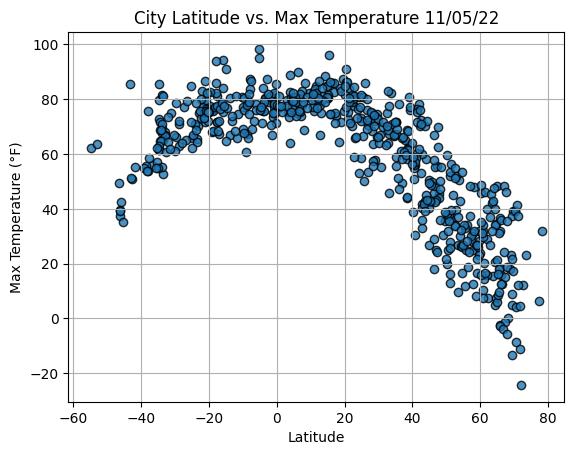

In [18]:
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
clouds=city_data_df["Cloudiness"]
winds=city_data_df["Wind Speed"]

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, alpha=.8, label="Cities")
plt.grid()
plt.title("City Latitude vs. Max Temperature (°F) 11/05/22")
#I could add "import time" then use "time.strftime("%x")" with the title, 
#but the data was not pulled on the day this plot is created, it was pulled on 11/5
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

plt.savefig("weather_data/Fig1Temps.png")
plt.show()

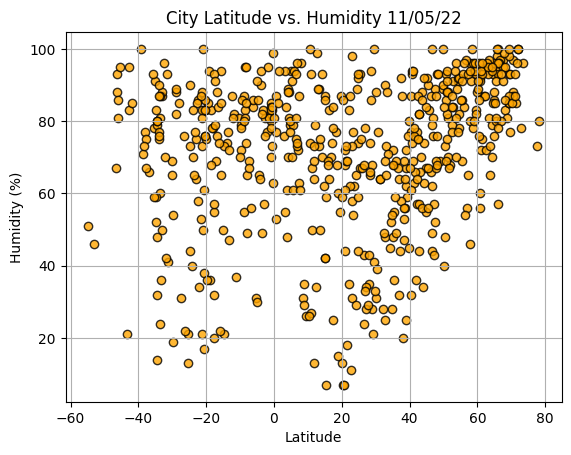

In [14]:
plt.scatter(lats, humidity, facecolor="orange", edgecolor="black", linewidths=1, alpha=.8, label="Cities")
plt.grid()
plt.title("City Latitude vs. Humidity (%) 11/05/22")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("weather_data/Fig2Humidity.png")
plt.show()

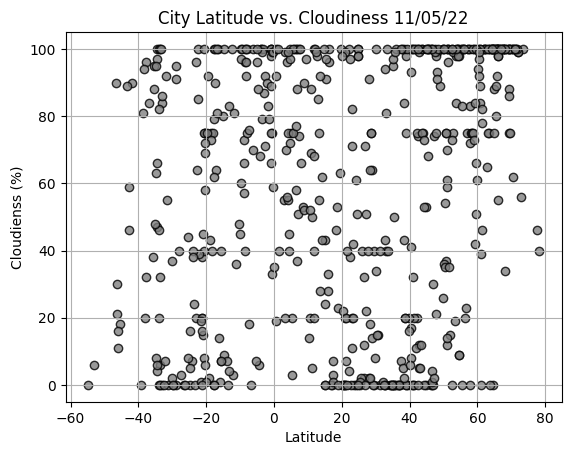

In [15]:
plt.scatter(lats, clouds, facecolor="gray", edgecolor="black", linewidths=1, alpha=.8, label="Cities")
plt.grid()
plt.title("City Latitude vs. Cloudiness (%) 11/05/22")

plt.xlabel("Latitude")
plt.ylabel("Cloudienss (%)")

plt.savefig("weather_data/Fig3Clouds.png")
plt.show()

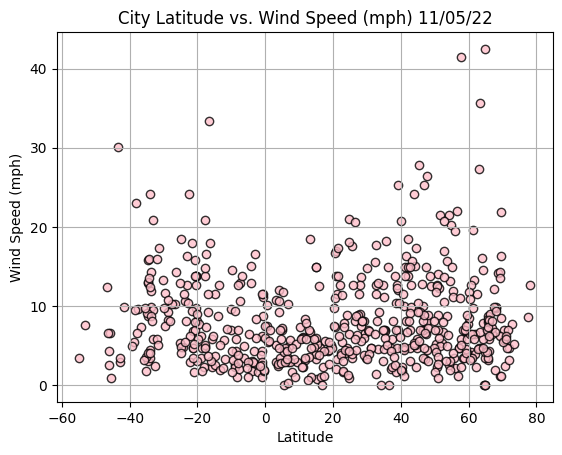

In [19]:
plt.scatter(lats, winds, facecolor="pink", edgecolor="black", linewidths=1, alpha=.8, label="Cities")
plt.grid()
plt.title("City Latitude vs. Wind Speed (mph) 11/05/22")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("weather_data/Fig4Winds.png")
plt.show()